In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from scipy import stats


from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA UPLOAD**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Health/EEG-data.csv')


df_3 = df[(df["y"] == 3)]
df_3 = df_3.drop(['y', 'Unnamed: 0'], axis=1)

df_4 = df[(df["y"] == 4)]
df_4 = df_4.drop(['y', 'Unnamed: 0'], axis=1)


In [ ]:
# Mean and standard deviation
df_3_mean = df_3.mean()
df_4_mean = df_4.mean()

df_3_sd = df_3.std()
df_4_sd = df_4.std()


# NORMALIZATION

In [ ]:
# Step 2: Normalize the selected classes using z-score manually
df_3_normalized = (df_3 - df_3.mean()) / df_3.std()
df_4_normalized = (df_4 - df_4.mean()) / df_4.std()
df_3_normalized.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X4085,X4086,X4087,X4088,X4089,X4090,X4091,X4092,X4093,X4094
3,0.957774,0.873880,0.850431,0.688030,0.645989,0.583219,0.417711,0.356205,0.287070,0.242536,...,-0.288536,-0.318160,-0.319831,-0.261575,-0.139497,-0.094118,-0.088173,-0.093367,-0.104557,0.041719
9,1.273546,1.198672,1.145848,1.088789,1.208349,1.281577,1.304194,1.088989,1.020459,0.794133,...,-0.036319,-0.090270,-0.277300,-0.533106,-0.788686,-0.829417,-0.683713,-0.585668,-0.392495,-0.301423
10,-0.325047,-0.406180,-0.331236,-0.259218,-0.279185,-0.168859,-0.167368,-0.036997,0.112453,0.142245,...,0.354617,0.340190,0.374837,0.341827,0.351354,0.445101,0.441196,0.449861,0.435326,0.330680
17,0.997246,1.084039,1.238165,1.343818,1.371615,1.406924,1.428302,1.464318,1.334769,1.228725,...,0.695110,0.568080,0.488253,0.417253,0.303852,0.265361,0.126883,0.076391,0.057408,0.005599
22,-1.765755,-1.628925,-1.420585,-1.242899,-1.222498,-1.189537,-1.195688,-1.234474,-1.074939,-0.877374,...,0.203287,0.137621,0.034592,-0.065469,-0.218666,-0.420917,-0.600999,-0.602643,-0.482476,-0.626505


In [ ]:
train_ratio = 0.8
train_df_3, test_df_3 = train_test_split(df_3_normalized, train_size=train_ratio, random_state=42)

# Split df_4 into training and test sets
train_df_4, test_df_4 = train_test_split(df_4_normalized, train_size=train_ratio, random_state=42)

# Combine the training sets of df_3 and df_4
train_df_combined = pd.concat([train_df_3, train_df_4], axis=1)

# Combine the test sets of df_3 and df_4
test_df_combined = pd.concat([test_df_3, test_df_4], axis=1)

In [ ]:
train_df_4['y'] = 1
train_df_3['y'] = 0

# Merge the datasets
result = [train_df_3, train_df_4]
df_combined = pd.concat(result)
df_combined

test_df_4['y'] = 1
test_df_3['y'] = 0
result_test = [test_df_3, test_df_4]


# DATA SPLIT

In [ ]:

df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)#shuffle

X_train = df_combined.drop('y', axis=1)
y_train = df_combined['y']


x_test = pd.concat(result_test)
x_test = x_test.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle

X_test=x_test.drop('y', axis=1)
y_test= x_test['y']



# TRAIN AND TEST

In [ ]:
"""
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Example range for C
    'gamma': [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],  # Example range for gamma
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}

# Create a SVC model instance
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the model with data
grid_search.fit(X_train, y_train)

# Review the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100, 1000],  # Example range for C\n    \'gamma\': [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],  # Example range for gamma\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\']  # Kernel type\n}\n\n# Create a SVC model instance\nsvm_model = SVC(random_state=42)\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation\n\n# Fit the model with data\ngrid_search.fit(X_train, y_train)\n\n# Review the best parameters and score\nprint("Best parameters found:", grid_search.best_params_)\nprint("Best cross-validation score:", grid_search.best_score_)\n'

In [ ]:
#Best parameters found:  OrderedDict([('C', 1000000.0), ('gamma', 0.000570349311114605), ('kernel', 'rbf')])
svm_classifier = svm.SVC(kernel='rbf', gamma = 0.0005, random_state=42)
svm_classifier.fit(X_train, y_train)


#  StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)

cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())


y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")

Cross-validation scores: [0.75    0.6875  0.59375 0.8125  0.625  ]
Mean cross-validation accuracy: 0.69375
Accuracy: 0.875
Precision: 0.8836317135549873
Recall: 0.875
F1 Score: 0.8742928975487114
[[16  4]
 [ 1 19]]
Specificity: 0.8


# OUTLIER DETECTION

In [ ]:
z_score_threshold = 2.5

df_3_normalized = train_df_3.drop(['y'], axis=1)
exceeds_threshold = np.abs(df_3_normalized) > z_score_threshold

# Calculate the number of features exceeding the threshold in each row
num_exceeding_per_row = np.sum(exceeds_threshold, axis=1)

# Total number of features
total_features = df_3_normalized.shape[1]
print(total_features)

# Calculate the 70% threshold of total features for comparison
features_threshold = 250

# Identify rows where the number of features exceeding the threshold is less than 80% of total features
rows_to_keep = num_exceeding_per_row < features_threshold

# Keep these rows, effectively removing the ones where 70% or more of the values exceed the threshold
filtered_data = df_3_normalized[rows_to_keep]

#filtered_data = pd.DataFtame(filtered_data) #convert pandas dataframe

# Output the dimensions of the original and filtered datasets for comparison
filtered_row_count = filtered_data.shape[0]

filtered_row_count

4094


76

In [ ]:
z_score_threshold = 2.5

df_4_normalized = train_df_4.drop(['y'], axis=1)
exceeds_threshold = np.abs(df_4_normalized) > z_score_threshold

# Calculate the number of features exceeding the threshold in each row
num_exceeding_per_row = np.sum(exceeds_threshold, axis=1)

# Total number of features
total_features = df_4_normalized.shape[1]
print(total_features)

# Calculate the 70% threshold of total features for comparison
features_70_percent_threshold = 250

# Identify rows where the number of features exceeding the threshold is less than 80% of total features
rows_to_keep_2 = num_exceeding_per_row < features_70_percent_threshold

# Keep these rows, effectively removing the ones where 70% or more of the values exceed the threshold
filtered_data_2 = df_4_normalized[rows_to_keep_2]

#filtered_data = pd.DataFtame(filtered_data) #convert pandas dataframe

# Output the dimensions of the original and filtered datasets for comparison
filtered_row_count_2 = filtered_data_2.shape[0]

filtered_row_count_2

4094


75

In [ ]:
filtered_data['y'] = 0 #DF 3
filtered_data_2['y'] = 1 #df 4


#merge the datasets
result = [filtered_data, filtered_data_2]
df_combined = pd.concat(result)


df_cleaned = df_combined.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle

y_train_cleaned= df_cleaned['y']
X_train_cleaned=df_cleaned.drop('y', axis=1)




<ipython-input-13-2e296900b823>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['y'] = 0 #DF 3
<ipython-input-13-2e296900b823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2['y'] = 1 #df 4


# CLEANED DATA MODEL EVALUATION

In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Example range for C
    'gamma': [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],  # Example range for gamma
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
}

# Create a SVC model instance
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the model with data
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Review the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
"""

'from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100, 1000],  # Example range for C\n    \'gamma\': [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],  # Example range for gamma\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],  # Kernel type\n}\n\n# Create a SVC model instance\nsvm_model = SVC(random_state=42)\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3, cv=5)  # cv=5 for 5-fold cross-validation\n\n# Fit the model with data\ngrid_search.fit(X_train_cleaned, y_train_cleaned)\n\n# Review the best parameters and score\nprint("Best parameters found:", grid_search.best_params_)\nprint("Best cross-validation score:", grid_search.best_score_)\n'

In [ ]:
#Best parameters found:  OrderedDict([('C', 1000000.0), ('gamma', 0.000570349311114605), ('kernel', 'rbf')])
svm_classifier = svm.SVC(kernel='rbf', C= 10, gamma=0.0005, random_state=42)
svm_classifier.fit(X_train_cleaned, y_train_cleaned)


#  StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)

cross_val_scores = cross_val_score(svm_classifier, X_train_cleaned, y_train_cleaned, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())


y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")

Cross-validation scores: [0.74193548 0.7        0.7        0.5        0.8       ]
Mean cross-validation accuracy: 0.6883870967741934
Accuracy: 0.9
Precision: 0.9040404040404042
Recall: 0.9
F1 Score: 0.8997493734335841
[[17  3]
 [ 1 19]]
Specificity: 0.85


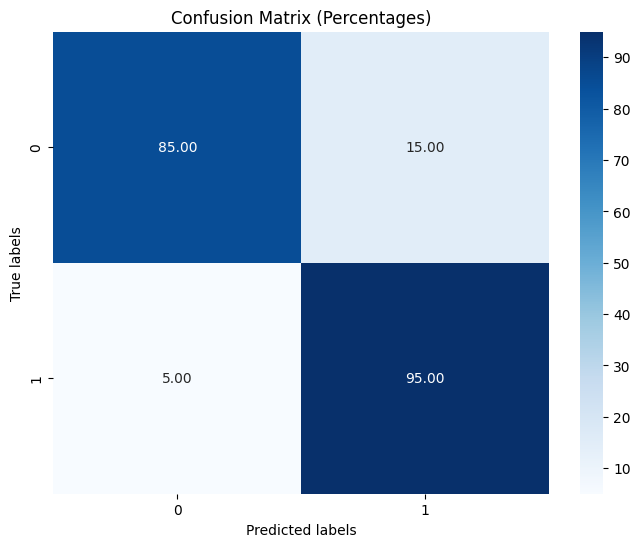

In [ ]:
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting the confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

## FEATURE SELECTION

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Apply PCA
pca = PCA(n_components=0.95)  # Choose the number of components that explain at least 95% of the variance
pca.fit(X_train_cleaned)

# Transform both training and test data
X_train_pca = pca.transform(X_train_cleaned)
X_test_pca = pca.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  # Example range for C
              'gamma': [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],  # Example range for gamma
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
              }  # Example range for gamma}

# Perform grid search with cross-validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train_cleaned)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best SVM classifier
best_svm = grid_search.best_estimator_

# Evaluate the model
accuracy = best_svm.score(X_test_pca, y_test)
print("Accuracy:", accuracy)

# Get the prediction results
y_pred = best_svm.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Sensitivity:", recall)

# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)

Best Hyperparameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.825
Accuracy: 0.825
Sensitivity: 0.825
Specificity: 0.85
[[17  3]
 [ 4 16]]


## K best


In [ ]:
# apply SelectKBest
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(normalized_data, normalized_labels, test_size=0.2, random_state=42)

# Perform feature selection
k = 50  # Choose the number of top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k) # try different score_func
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

#Define an SVM classifier
svm_classifier = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Example range for gamma
}

# Perform grid search with cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=folds)
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_svm_classifier = grid_search.best_estimator_
accuracy = best_svm_classifier.score(X_test_selected, y_test)
print("Accuracy:", accuracy)

# Get the prediction results
y_pred = best_svm_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)

Best Hyperparameters: {'C': 10, 'gamma': 0.1}
Accuracy: 0.9
Accuracy: 0.9
Precision: 0.9
Recall: 0.9
Specificity: 0.9
[[18  2]
 [ 2 18]]


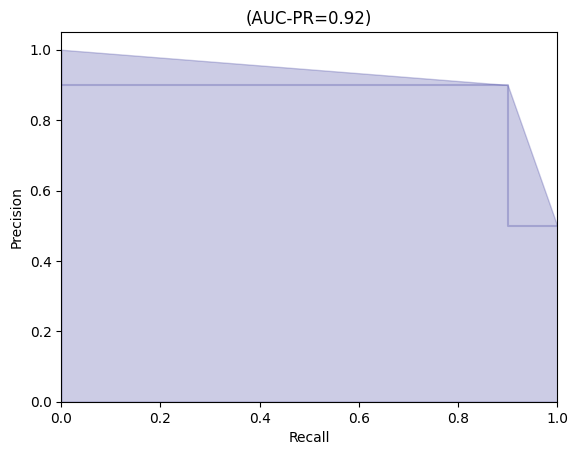

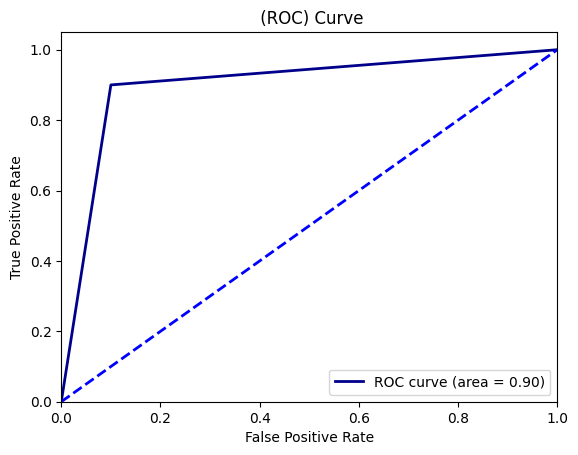

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='#000080', alpha=0.2, where='post')  # Hex code for dark blue
plt.fill_between(recall, precision, alpha=0.2, color='#000080')  # Hex code for dark blue

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'(AUC-PR={auc_pr:.2f})')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier with desired parameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the cleaned training data and labels
rf_classifier.fit(X_train_cleaned, y_train_cleaned)

# Use the trained RandomForestClassifier to make predictions on the cleaned test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance of the model using appropriate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)


Random Forest Classifier Performance:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001
Specificity: 0.9
[[18  2]
 [ 2 18]]


###PCA for random forest


In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Initialize and fit PCA on the training data
pca = PCA(n_components=0.95)
pca.fit(X_train_cleaned)

# 2. Transform both training and test data
X_train_pca = pca.transform(X_train_cleaned)
X_test_pca = pca.transform(X_test)

# 3. Define the parameter grid for GridSearchCV

  # Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2'],
}

# 4. Initialize GridSearchCV
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# 5. Fit GridSearchCV on the training data
grid_search.fit(X_train_pca, y_train_cleaned)

# 6. Use the best estimator from GridSearchCV to predict on the test data
y_pred = grid_search.predict(X_test_pca)

# 7. Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)


Accuracy: 0.8
Precision: 1.0
Recall: 0.6
F1 Score: 0.7499999999999999
Specificity: 1.0
[[20  0]
 [ 8 12]]


In [ ]:

  # Best hyperparameters
  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

##Select K best for random

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Perform feature selection
k = 50  # Choose the number of top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k) # try different score_func
X_train_selected = selector.fit_transform(X_train_cleaned, y_train_cleaned)
X_test_selected = selector.transform(X_test)



# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# 4. Initialize GridSearchCV
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# 5. Fit GridSearchCV on the training data
grid_search.fit(X_train_selected, y_train_cleaned)

# 6. Use the best estimator from GridSearchCV to predict on the test data
y_pred = grid_search.predict(X_test_selected)

# 7. Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001
Specificity: 0.95
[[19  1]
 [ 1 19]]


In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}


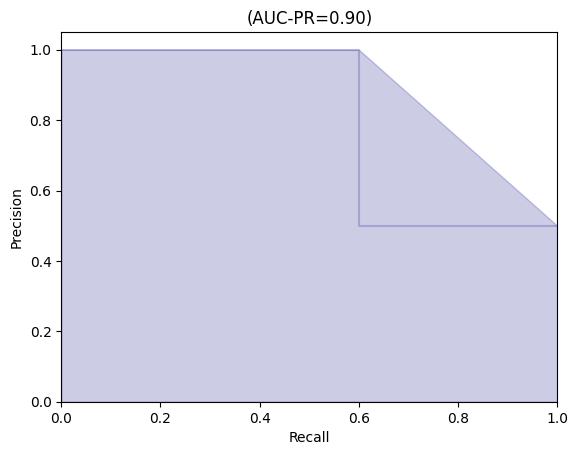

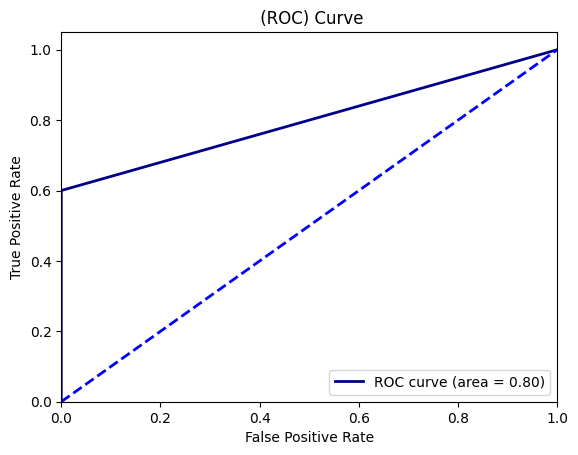

In [ ]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_pr = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='#000080', alpha=0.2, where='post')  # Hex code for dark blue
plt.fill_between(recall, precision, alpha=0.2, color='#000080')  # Hex code for dark blue

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'(AUC-PR={auc_pr:.2f})')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Perform feature selection
k = 100  # Choose the number of top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k) # try different score_func
X_train_selected = selector.fit_transform(X_train_cleaned, y_train_cleaned)
X_test_selected = selector.transform(X_test)



# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# 4. Initialize GridSearchCV
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# 5. Fit GridSearchCV on the training data
grid_search.fit(X_train_selected, y_train_cleaned)

# 6. Use the best estimator from GridSearchCV to predict on the test data
y_pred = grid_search.predict(X_test_selected)

# 7. Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")

Confusion matrix:
 [[ 95   5]
 [  0 100]]


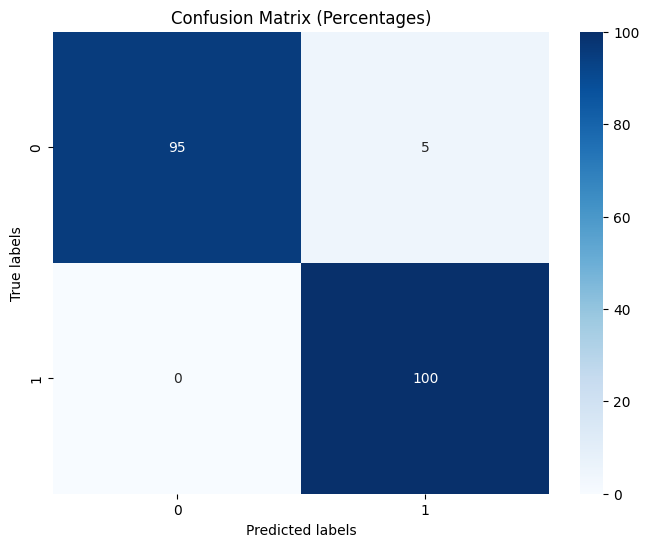

In [ ]:

print("Confusion matrix:\n", conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()



In [ ]:
print("Best Parameters:", grid_search.best_params_)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Perform feature selection
k = 1000  # Choose the number of top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k) # try different score_func
X_train_selected = selector.fit_transform(X_train_cleaned, y_train_cleaned)
X_test_selected = selector.transform(X_test)



# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# 4. Initialize GridSearchCV
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# 5. Fit GridSearchCV on the training data
grid_search.fit(X_train_selected, y_train_cleaned)

# 6. Use the best estimator from GridSearchCV to predict on the test data
y_pred = grid_search.predict(X_test_selected)

# 7. Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
[[20  0]
 [ 0 20]]


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Perform feature selection
k = 1  # Choose the number of top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k) # try different score_func
X_train_selected = selector.fit_transform(X_train_cleaned, y_train_cleaned)
X_test_selected = selector.transform(X_test)



# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

# 4. Initialize GridSearchCV
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# 5. Fit GridSearchCV on the training data
grid_search.fit(X_train_selected, y_train_cleaned)

# 6. Use the best estimator from GridSearchCV to predict on the test data
y_pred = grid_search.predict(X_test_selected)

# 7. Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Calculating specificity from the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")
print(conf_matrix)